## Lab 4

In [1]:
#Libraries
import pandas as pd

In [4]:
#df1 supplier data
file1='supplier.data'
df1=pd.read_csv(file1,index_col=0, header=0,sep='\s+')
df1

,SNAME,STATUS,CITY
S1,Smith,20,London
S2,Jones,10,Paris
S3,Blake,30,Paris
S4,Clark,20,London
S5,Adams,30,Athens


In [9]:
#Printing the name of the columns that exist in my df1 dataframe
df1.columns

Index(['SNAME', 'STATUS', 'CITY'], dtype='object')

In [11]:
#Printing the index of the rows that exist in my df1 dataframe
df1.index

Index(['S1', 'S2', 'S3', 'S4', 'S5'], dtype='object')

In [13]:
#gives me information about the columns, regarding empty counts and type of the feauters
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, S1 to S5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SNAME   5 non-null      object
 1   STATUS  5 non-null      int64 
 2   CITY    5 non-null      object
dtypes: int64(1), object(2)
memory usage: 160.0+ bytes


In [19]:
#Displays the first 5 rows of my dataset in this case the dataset is 5 rows long
df1.head()

,SNAME,STATUS,CITY
S1,Smith,20,London
S2,Jones,10,Paris
S3,Blake,30,Paris
S4,Clark,20,London
S5,Adams,30,Athens


In [20]:
#Displays the last 5 rows of my dataset in this case the dataset is 5 rows long
df1.tail()

,SNAME,STATUS,CITY
S1,Smith,20,London
S2,Jones,10,Paris
S3,Blake,30,Paris
S4,Clark,20,London
S5,Adams,30,Athens


In [22]:
#Givinf the calues in list rows in a array type
df1.values

array([['Smith', 20, 'London'],
       ['Jones', 10, 'Paris'],
       ['Blake', 30, 'Paris'],
       ['Clark', 20, 'London'],
       ['Adams', 30, 'Athens']], dtype=object)

In [24]:
#Give some basic statistics regaridng the df1
df1.describe()

,STATUS
count,5.0000
mean,22.0000
std,8.3666
min,10.0000
25%,20.0000
50%,20.0000
75%,30.0000
max,30.0000


## DF2 Product Data

In [5]:
#product data
df2=pd.read_csv('product.data',index_col=0, header=0,sep='\s+')
df2

,PNAME,COLOR,WEIGHT,CITY
P1,Nut,Red,12.0,London
P2,Bolt,Green,17.0,Paris
P3,Screw,Blue,17.0,Oslo
P4,Screw,Red,14.0,London
P5,Cam,Blue,12.0,Paris
P6,Cog,Red,19.0,London


## DF3 supplierProduct DATA

In [7]:
#Supplier product data
df3=pd.read_csv('supplierProduct.data',index_col=0, header=0,sep='\s+')
df3

,P#,QTY
S1,P1,200
S1,P1,700
S2,P3,400
S2,P3,200
S2,P3,200
S2,P3,500
S2,P3,600
S2,P3,400
S2,P3,800
S2,P5,100


## Filtering the data Frames

In [25]:
#find the suppliers with status>20
df1[df1['STATUS']>20]

,SNAME,STATUS,CITY
S3,Blake,30,Paris
S5,Adams,30,Athens


In [26]:
# Find The supplier whose city is London
df1[df1['CITY']=='London']

,SNAME,STATUS,CITY
S1,Smith,20,London
S4,Clark,20,London


In [27]:
#count the suppliers per city
df1.groupby('CITY').count()

,SNAME,STATUS
CITY,,
Athens,1,1
London,2,2
Paris,2,2


In [28]:
# sort according to City
df1.sort_values(by='CITY', ascending=True)

,SNAME,STATUS,CITY
S5,Adams,30,Athens
S1,Smith,20,London
S4,Clark,20,London
S2,Jones,10,Paris
S3,Blake,30,Paris


<Axes: >

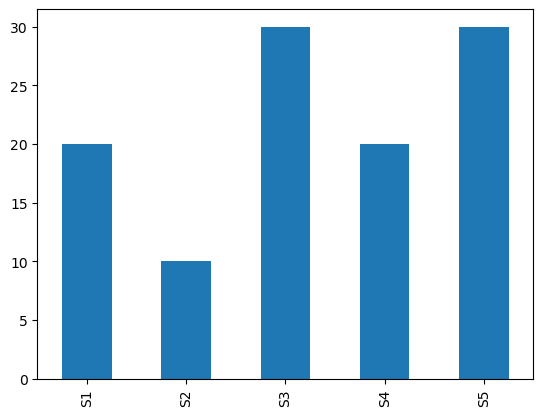

In [29]:
#Plot the status
df1['STATUS'].plot.bar()

In [30]:
#unique cities
df1['CITY'].unique()

array(['London', 'Paris', 'Athens'], dtype=object)

In [31]:
#change, update
df1.loc['S4','SNAME']='Adams'

In [32]:
#How much memory does it take to store the data frame?
print("memory:", df1.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, S1 to S5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SNAME   5 non-null      object
 1   STATUS  5 non-null      int64 
 2   CITY    5 non-null      object
dtypes: int64(1), object(2)
memory usage: 1.1 KB
memory: None


In [34]:
#Number of people per city
group = df1['SNAME'].groupby(df1['CITY']).count()
group

CITY
Athens    1
London    2
Paris     2
Name: SNAME, dtype: int64

In [36]:
#Brings back only the unique valus that are in the column CITY
df1['CITY'].unique()

array(['London', 'Paris', 'Athens'], dtype=object)

In [38]:
#Brings back the number of unique items in the column CITY of df1
df1['CITY'].nunique()

3

## Merging Data Frames

In [44]:
df2

,PNAME,COLOR,WEIGHT,CITY
P1,Nut,Red,12.0,London
P2,Bolt,Green,17.0,Paris
P3,Screw,Blue,17.0,Oslo
P4,Screw,Red,14.0,London
P5,Cam,Blue,12.0,Paris
P6,Cog,Red,19.0,London


In [43]:
#Number of people per city
group_product = df2['PNAME'].groupby(df2['CITY']).count()
group_product

CITY
London    3
Oslo      1
Paris     2
Name: PNAME, dtype: int64

In [52]:
Res1=pd.merge(df1, df3, how='inner', left_index=True, right_index=True)
Res1

,SNAME,STATUS,CITY,P#,QTY
S1,Smith,20,London,P1,200
S1,Smith,20,London,P1,700
S2,Jones,10,Paris,P3,400
S2,Jones,10,Paris,P3,200
S2,Jones,10,Paris,P3,200
S2,Jones,10,Paris,P3,500
S2,Jones,10,Paris,P3,600
S2,Jones,10,Paris,P3,400
S2,Jones,10,Paris,P3,800
S2,Jones,10,Paris,P5,100


In [47]:
df3

,P#,QTY
S1,P1,200
S1,P1,700
S2,P3,400
S2,P3,200
S2,P3,200
S2,P3,500
S2,P3,600
S2,P3,400
S2,P3,800
S2,P5,100


In [48]:
df1

,SNAME,STATUS,CITY
S1,Smith,20,London
S2,Jones,10,Paris
S3,Blake,30,Paris
S4,Adams,20,London
S5,Adams,30,Athens
